# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

import numpy as np

import pandas as pd
signnames = pd.read_csv('signnames.csv').values[:,1]

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Examine the distribution of the signs in the training set. Apperantly it's very unbalanced, some classes are way under average(red dotted line).

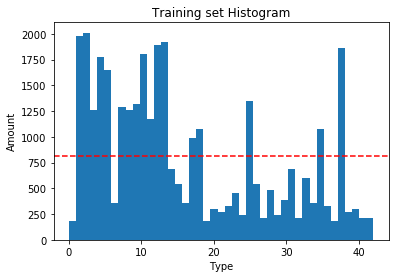

In [4]:
plt.hist(y_train, bins=n_classes)
plt.title("Training set Histogram")
plt.xlabel("Type")
plt.ylabel("Amount")
plt.axhline(n_train/n_classes, c='r', ls='--')
plt.show()

Show some samples in each class.

Class 0: Speed limit (20km/h)                               180 samples


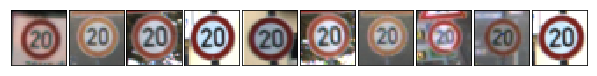

------------------------------------------------------------------------
Class 1: Speed limit (30km/h)                               1980 samples


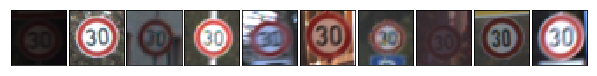

------------------------------------------------------------------------
Class 2: Speed limit (50km/h)                               2010 samples


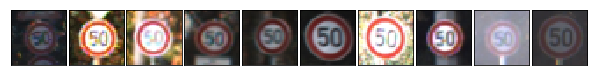

------------------------------------------------------------------------
Class 3: Speed limit (60km/h)                               1260 samples


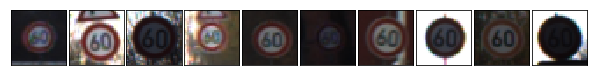

------------------------------------------------------------------------
Class 4: Speed limit (70km/h)                               1770 samples


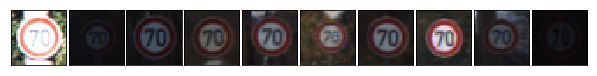

------------------------------------------------------------------------
Class 5: Speed limit (80km/h)                               1650 samples


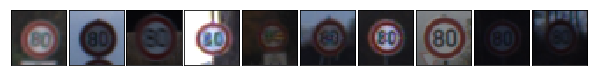

------------------------------------------------------------------------
Class 6: End of speed limit (80km/h)                        360 samples


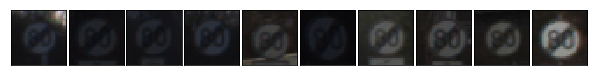

------------------------------------------------------------------------
Class 7: Speed limit (100km/h)                              1290 samples


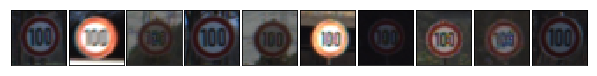

------------------------------------------------------------------------
Class 8: Speed limit (120km/h)                              1260 samples


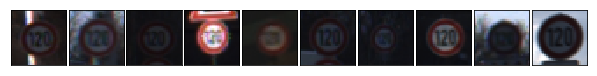

------------------------------------------------------------------------
Class 9: No passing                                         1320 samples


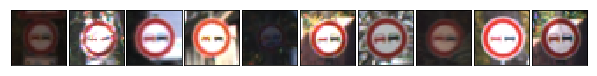

------------------------------------------------------------------------
Class 10: No passing for vehicles over 3.5 metric tons       1800 samples


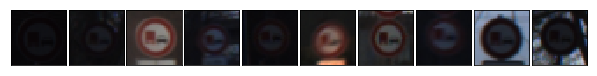

------------------------------------------------------------------------
Class 11: Right-of-way at the next intersection              1170 samples


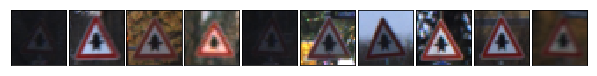

------------------------------------------------------------------------
Class 12: Priority road                                      1890 samples


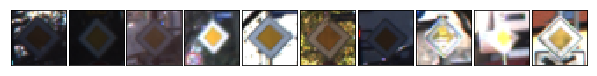

------------------------------------------------------------------------
Class 13: Yield                                              1920 samples


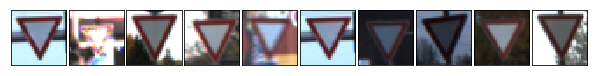

------------------------------------------------------------------------
Class 14: Stop                                               690 samples


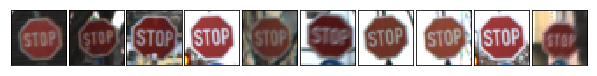

------------------------------------------------------------------------
Class 15: No vehicles                                        540 samples


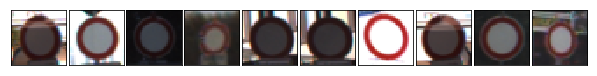

------------------------------------------------------------------------
Class 16: Vehicles over 3.5 metric tons prohibited           360 samples


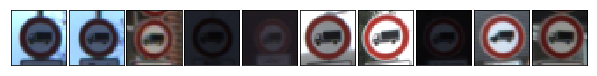

------------------------------------------------------------------------
Class 17: No entry                                           990 samples


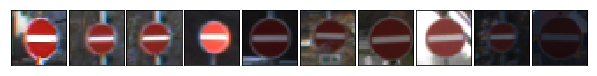

------------------------------------------------------------------------
Class 18: General caution                                    1080 samples


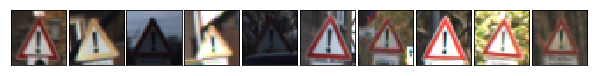

------------------------------------------------------------------------
Class 19: Dangerous curve to the left                        180 samples


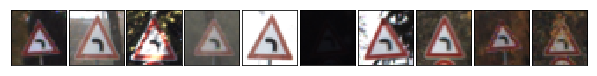

------------------------------------------------------------------------
Class 20: Dangerous curve to the right                       300 samples


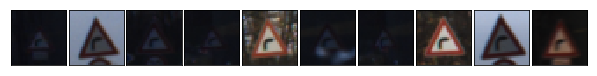

------------------------------------------------------------------------
Class 21: Double curve                                       270 samples


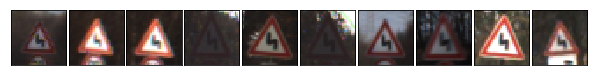

------------------------------------------------------------------------
Class 22: Bumpy road                                         330 samples


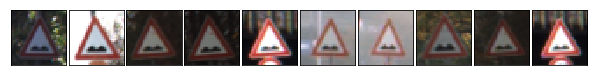

------------------------------------------------------------------------
Class 23: Slippery road                                      450 samples


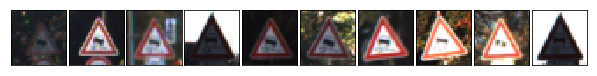

------------------------------------------------------------------------
Class 24: Road narrows on the right                          240 samples


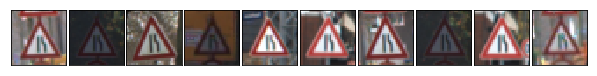

------------------------------------------------------------------------
Class 25: Road work                                          1350 samples


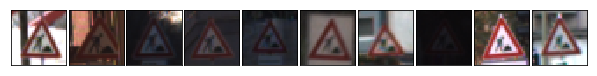

------------------------------------------------------------------------
Class 26: Traffic signals                                    540 samples


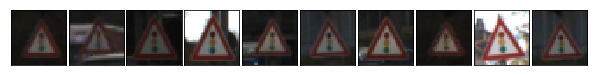

------------------------------------------------------------------------
Class 27: Pedestrians                                        210 samples


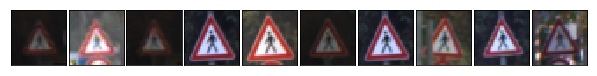

------------------------------------------------------------------------
Class 28: Children crossing                                  480 samples


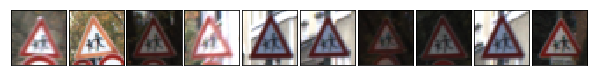

------------------------------------------------------------------------
Class 29: Bicycles crossing                                  240 samples


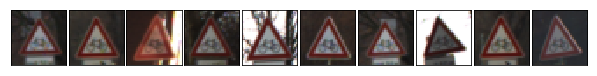

------------------------------------------------------------------------
Class 30: Beware of ice/snow                                 390 samples


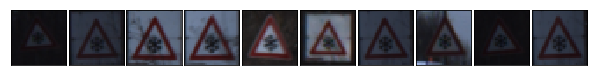

------------------------------------------------------------------------
Class 31: Wild animals crossing                              690 samples


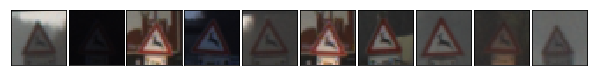

------------------------------------------------------------------------
Class 32: End of all speed and passing limits                210 samples


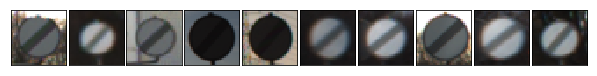

------------------------------------------------------------------------
Class 33: Turn right ahead                                   599 samples


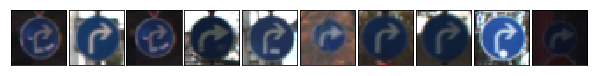

------------------------------------------------------------------------
Class 34: Turn left ahead                                    360 samples


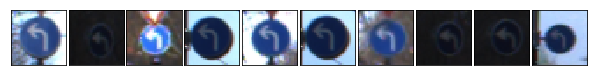

------------------------------------------------------------------------
Class 35: Ahead only                                         1080 samples


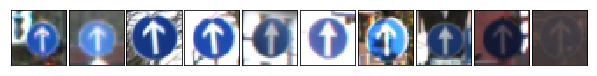

------------------------------------------------------------------------
Class 36: Go straight or right                               330 samples


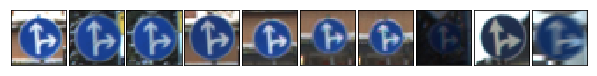

------------------------------------------------------------------------
Class 37: Go straight or left                                180 samples


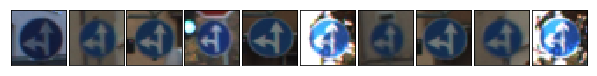

------------------------------------------------------------------------
Class 38: Keep right                                         1860 samples


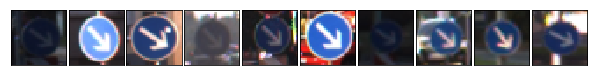

------------------------------------------------------------------------
Class 39: Keep left                                          270 samples


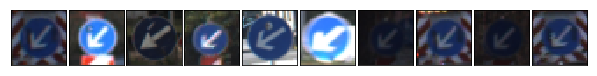

------------------------------------------------------------------------
Class 40: Roundabout mandatory                               300 samples


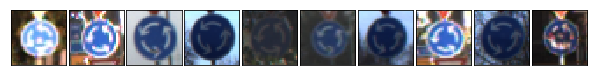

------------------------------------------------------------------------
Class 41: End of no passing                                  210 samples


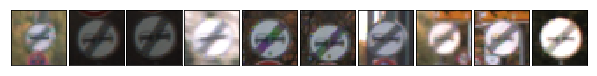

------------------------------------------------------------------------
Class 42: End of no passing by vehicles over 3.5 metric tons 210 samples


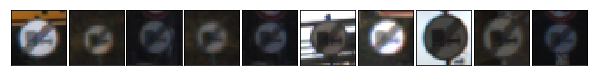

------------------------------------------------------------------------


In [5]:
if True:
    import random

    col_width = max(len(name) for name in signnames)

    for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
        print("Class %i: %-*s %s samples" % (c, col_width, signnames[c], str(c_count)))
        fig = plt.figure(figsize=(8, 1))
        fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

        random_indices = random.sample(range(c_index, c_index + c_count), 10)
        for i in range(10):
            axis_1 = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
            axis_1.imshow(X_train[random_indices[i]])
        plt.show()
        print('------------------------------------------------------------------------')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [7]:
import cv2
import tensorflow as tf

In [8]:
# Switches

# Only up to one can be true below
convert_to_grayscale = False
convert_to_luma = False

do_normalize = True

EPOCHS = 100
BATCH_SIZE = 64

### RGB to grayscale
Reduce 3 channels to 1 channel to lower the complexity.

In [9]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [10]:
if convert_to_grayscale:
    X_train = [grayscale(img) for img in X_train]
    X_test = [grayscale(img) for img in X_test]
    X_train = np.asarray(X_train).reshape(-1, 32, 32, 1)
    X_test = np.asarray(X_test).reshape(-1, 32, 32, 1)

In [11]:
def yuv(img):
    return np.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV), 3, 2)[0]

if convert_to_luma:
    X_train = [yuv(img) for img in X_train]
    X_test = [yuv(img) for img in X_test]
    X_train = np.asarray(X_train).reshape(-1, 32, 32, 1)
    X_test = np.asarray(X_test).reshape(-1, 32, 32, 1)

### Normalize the data
The data type in the original data is uint8 and the value range is 0-255. Let's cast it to np.float32 and normalize it by the way showed in the course material. (X=(X-128)/128, X is for R/G/B)

In [12]:
if do_normalize:
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    X_train = (X_train - 128) / 128
    X_test = (X_test - 128) / 128

In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
slim = tf.contrib.slim

def LeNetSlim(x, keep_prob):
    # Conv 32x32x3 => 28x28x6 + relu
    net = slim.conv2d(x, 16, [5, 5], padding='VALID', scope='conv1')

    # pool 28x28x6 => 14x14x6
    net = slim.max_pool2d(net, [2, 2], scope='pool1')
    
    # Conv 14x14x6 => 10x10x16 + relu
    net = slim.conv2d(net, 26, [5, 5], padding='VALID', scope='conv2')

    # pool 10x10x16 => 5x5x16
    net = slim.max_pool2d(net, [2, 2], scope='pool2')
    
    # flatten 5x5x16 => 400
    net = slim.flatten(net, scope='flat1')
    
    # fc 400 => 120 + relu
    net = slim.fully_connected(net, 120, scope='fc1')

    net = slim.dropout(net, keep_prob)

    # fc 120 => 84 + relu
    net = slim.fully_connected(net, 84, scope='fc2')

    net = slim.dropout(net, keep_prob)

    # fc 84 => 43
    net = slim.fully_connected(net, n_classes, activation_fn=None, scope='fc3')    
    
    return net

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [17]:
rate = 0.001

logits = LeNetSlim(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .5})
        
        if (i + 1) % 10 == 0:
            validation_accuracy = evaluate(X_validation, y_validation)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 10 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.993

EPOCH 30 ...
Validation Accuracy = 0.993

EPOCH 40 ...
Validation Accuracy = 0.993

EPOCH 50 ...
Validation Accuracy = 0.993

EPOCH 60 ...
Validation Accuracy = 0.996

EPOCH 70 ...
Validation Accuracy = 0.992

EPOCH 80 ...
Validation Accuracy = 0.993

EPOCH 90 ...
Validation Accuracy = 0.996

EPOCH 100 ...
Validation Accuracy = 0.995

Model saved


In [20]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.958


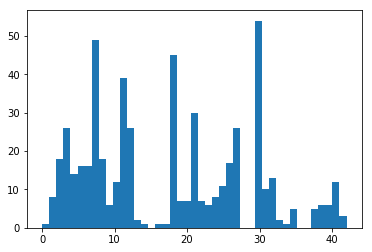

In [21]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    pred = sess.run(correct_prediction, feed_dict={x: X_test, y: y_test, keep_prob: 1.0})
    wrong_list = []
    for b, v in zip(pred, y_test):
        if not b:
            wrong_list.append(v)
    
    plt.hist(wrong_list, n_classes)
    plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I first check how many examples in the training set. It's only 39209 so I assume my DNN model can't be too deep. Initially I split 80% for training, 20% for validation. And uses the provided testing test for final result.

Since it's processing image, based on the experience from last project. It's knee jerk reaction that want to try
1. Convert color to grayscale (3 channels to 1 channel)
2. Convert RGB to YUV and uses Y channel only
3. Normalize the data

I did serveral experiements to examine which combination is the best. I used the standard LeNet first as baseline to tune all of the hyperparameters.
1. Pure LeNet, the validation accuracy is 95.2% in average among 4 rounds.
2. Normalized RGB + LeNet, the validation accuracy is 97.2% in average among 4 rounds.
3. Normalized grayscale + LeNet, the validation accuracy is 96.8% in average among 4 rounds.
4. Normalized Y + LeNet, the number was not recorded. But it was worse for sure.

Due to the rule of 30. I have 31367 samples in the training set(80% of 39209). 30 / 31367 is around 0.096%. It's clear that the normalized RGB is statistically better than others. So I only do normalization and use RGB 3 channels data for following experiments.

On the other hand, I was only using R = (R - 128) / 128 (and G, B) to convert 0~255 to -1.0~1.0. I didn't use mean and stddev at all because I think I should use the same parameters to normalize all the samples, I didn't feel right to use training set's mean and stddev to normalize the testing data set.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I just only the original provided data. I didn't generate additional data even I know the number of signs in each classes are not balanced. Some of them are as few as only 210 samples. I didn't do so because I assume the signs are not used in real world with equal possibility. For real application that the testing set should also reflect such distribution.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used a modifield LeNet. I firstly implement the LeNet using Tensorflow slim package. So you can see two implementation above. Secondly I need to check my slim version of LeNet has similar result with the original one. Turns out it did so I can add/tune the layers afterward confidently.

After many rounds of experiments. My final architecture is.

32x32x3 data ==> Conv(5x5x16) ==> max_pool(2x2) ==> Conv(5x5x26) ==> max_pool(2x2) ==> flatten(650) ==> fully_connected(120) ==> dropout ==> fully_connected(84) ==> dropout ==> fully_connected(43)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I am using AdamOptimizer so that I only need to consider learning rate which I used 0.001.

Regarding the batch size and epoch numbers. I did some experiments tool. Initially I guess as long as my GPU's memory is enough, the bigger batch size would converge faster. But according to my experiments it shows opposite result. It seems the smaller batch size have better validation error result. In the end I choose 64 as batch size.

|Epochs|	Batch size|	Validation error|
|---|---|---|
|10|	32|	0.979 *|
|10|	64|	0.979 *|
|10|	128|	0.977|
|10|	256|	0.972|
|10|	512|	0.958|
|50|	32|	0.98|
|50|	64|	0.993 *|
|50|	128|	0.991|
|50|	256|	0.989|
|50|	512|	0.987|
|100|	32|	0.989|
|100|	64|	0.993 *|
|100|	128|	0.993 *|
|100|	256|	0.992|
|100|	512|	0.989|

So the hyperparameters I used are
1. epoches: 100
2. learning rate: 0.001
3. batch size: 64

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Since I know the training set is small I know I can't use a complicated model that it will be easily over fitting. The project description indicates LeNet is a good start. Then I used it as a start. The inital result is exceptionally good(94%+) so I drop the thought to test other existed model like VGG/ResNet/Inception...

Then I wanted to tune the hyper parameters first before changing the model. So I did a series of experiments to find out which preprocessing methods are useful(only normalization is used). Then find out the best batch size(64).

After all the hyperparameters are decided. I started to tune the model. Firstly I think the original input for LeNet is only 1 channel and now we have 3. The kernel size of conv1(6) must be insufficient so I extend it to 16(No particular reason. I just felt the data is 3 times(1 channel to 3 channels), the kernel size should be also about 3 times. And also enlarge the kernel size of conv2 from 16 to 26. The validation accuracy increased so I kept it.

Then I add dropout after each fully connected stages w/ keep_prob 0.5. the validation accuracy increased to 0.996.

I also tried to add more layers in between but all of them can't improve the result.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [23]:
import os
import cv2

IMG_PATH = 'local_signs'

localsigns = np.zeros(shape=(len(os.listdir(IMG_PATH)), 32, 32, 3), dtype=np.uint8)
i = 0
for filename in os.listdir(IMG_PATH):
    fullpath = os.path.join(IMG_PATH, filename)
    img = plt.imread(fullpath)
    img = img[:, :, :3]
    img = img * 255
    localsigns[i] = img
    i = i + 1

localsigns_normalized = localsigns.astype(np.float32)
localsigns_normalized = (localsigns_normalized - 128) / 128

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    pred = sess.run(logits, feed_dict={x: localsigns_normalized, keep_prob: 1.0})
    softmax = sess.run(tf.nn.softmax(pred))
    top_k = sess.run(tf.nn.top_k(softmax, k=5))

In [25]:
def show_result(idx):
    plt.figure(figsize=(12,4))
    ax1 = plt.subplot(121)
    ax1.imshow(localsigns[idx])
    ax1.axis('off')
    ax2 = plt.subplot(122)
    ax2.bar(top_k.indices[idx], top_k.values[idx])
    plt.xlabel('Classes')
    plt.ylabel('Softmax')
    plt.show()
    print('-------------------------')
    total = sum(softmax[idx])
    for j in range(5):
        print('%s (%0.1f%%)' % (signnames[top_k.indices[idx]][j], top_k.values[idx][j]*100/total))
    print('-------------------------')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I was using Taiwan's traffic signs. As most of the signs are similar to German's, the prediction rate is quite high. Some signs that are not existed in the traing set so it's impossible to be identified correctly. However, the color might give certain hint so it gave German signs with similar color high score.

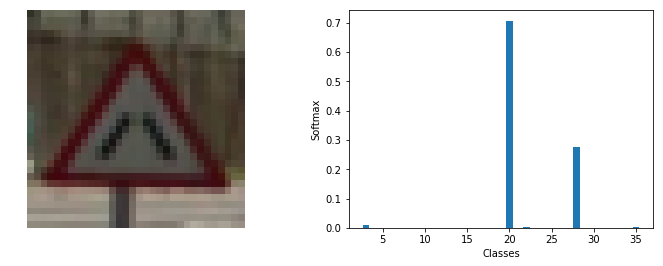

-------------------------
Dangerous curve to the right (70.7%)
Children crossing (27.6%)
Speed limit (60km/h) (0.9%)
Bumpy road (0.4%)
Ahead only (0.3%)
-------------------------


In [26]:
show_result(2)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

I provided 13 local images. Correct number is 6, incorrect number is 7. However 6 of 7 wrong predition because they are Taiwan only signs. So the over all accuracy is 6 / 13 = 46%. The fair accuracy should be 6 / 7 = 86%.

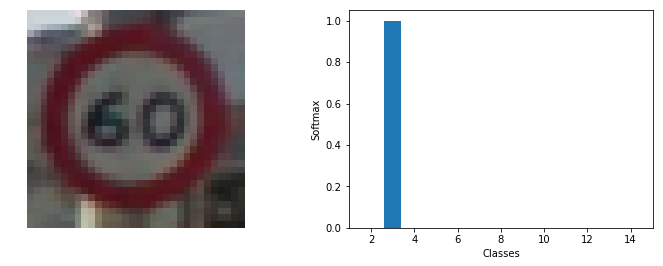

-------------------------
Speed limit (60km/h) (100.0%)
No passing (0.0%)
Speed limit (80km/h) (0.0%)
Speed limit (50km/h) (0.0%)
Stop (0.0%)
-------------------------


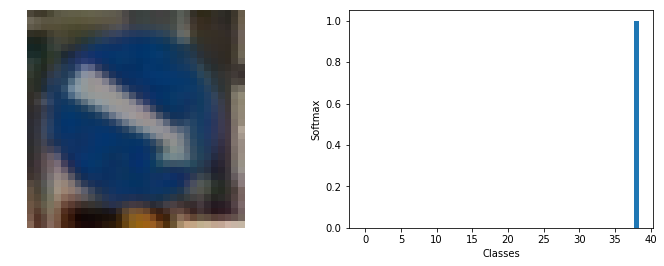

-------------------------
Keep right (100.0%)
Turn left ahead (0.0%)
Go straight or right (0.0%)
No vehicles (0.0%)
Speed limit (20km/h) (0.0%)
-------------------------


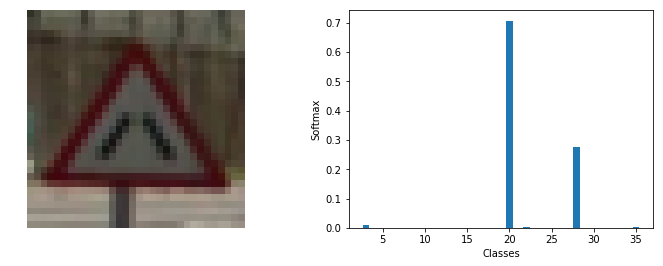

-------------------------
Dangerous curve to the right (70.7%)
Children crossing (27.6%)
Speed limit (60km/h) (0.9%)
Bumpy road (0.4%)
Ahead only (0.3%)
-------------------------


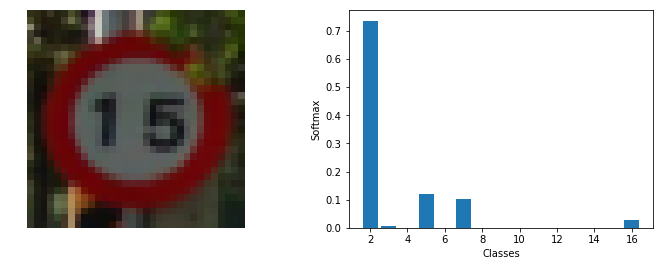

-------------------------
Speed limit (50km/h) (73.6%)
Speed limit (80km/h) (11.9%)
Speed limit (100km/h) (10.1%)
Vehicles over 3.5 metric tons prohibited (2.7%)
Speed limit (60km/h) (0.5%)
-------------------------


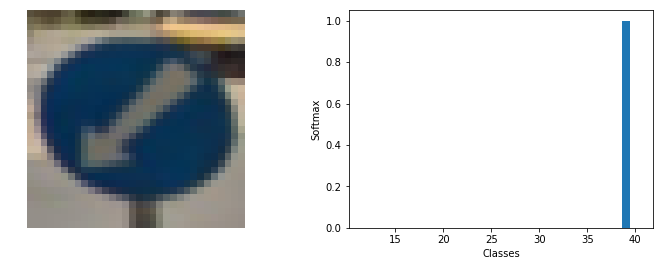

-------------------------
Keep left (100.0%)
Turn right ahead (0.0%)
Go straight or left (0.0%)
Roundabout mandatory (0.0%)
Priority road (0.0%)
-------------------------


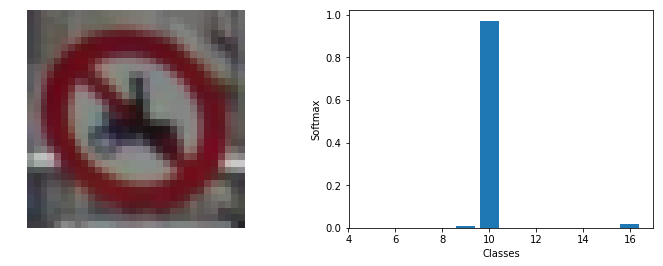

-------------------------
No passing for vehicles over 3.5 metric tons (97.2%)
Vehicles over 3.5 metric tons prohibited (1.9%)
No passing (0.9%)
Speed limit (100km/h) (0.0%)
Speed limit (80km/h) (0.0%)
-------------------------


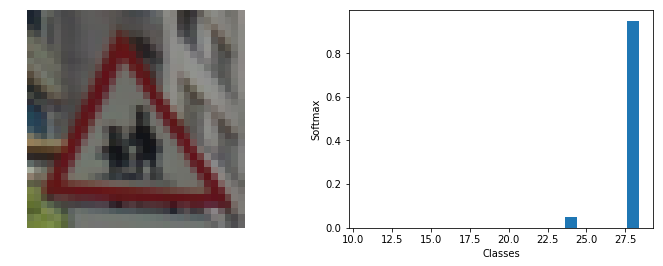

-------------------------
Children crossing (94.9%)
Road narrows on the right (5.1%)
General caution (0.0%)
Pedestrians (0.0%)
Right-of-way at the next intersection (0.0%)
-------------------------


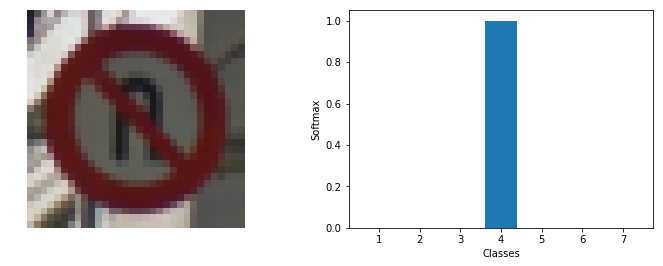

-------------------------
Speed limit (70km/h) (100.0%)
Speed limit (100km/h) (0.0%)
Speed limit (30km/h) (0.0%)
Speed limit (80km/h) (0.0%)
Speed limit (50km/h) (0.0%)
-------------------------


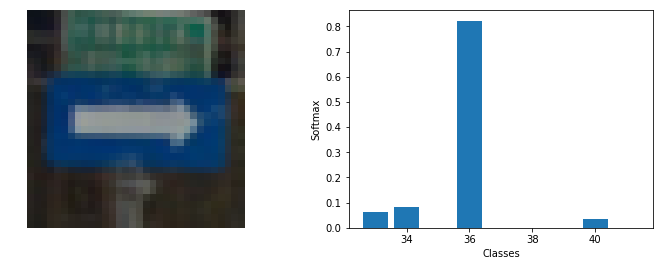

-------------------------
Go straight or right (82.2%)
Turn left ahead (8.3%)
Turn right ahead (6.1%)
Roundabout mandatory (3.3%)
End of no passing (0.0%)
-------------------------


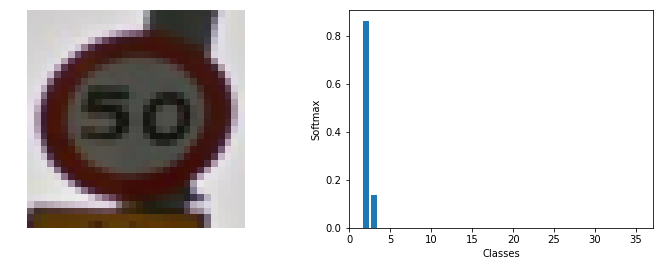

-------------------------
Speed limit (50km/h) (86.2%)
Speed limit (60km/h) (13.7%)
Speed limit (80km/h) (0.1%)
No passing (0.1%)
Ahead only (0.0%)
-------------------------


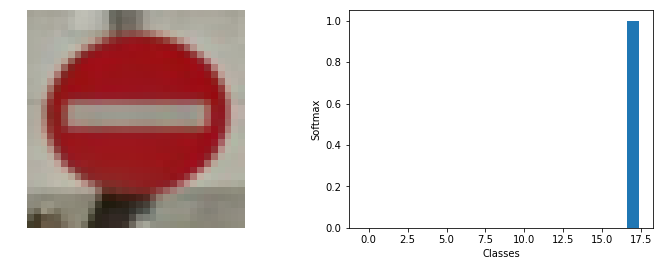

-------------------------
No entry (100.0%)
Speed limit (20km/h) (0.0%)
Speed limit (30km/h) (0.0%)
Speed limit (50km/h) (0.0%)
Speed limit (60km/h) (0.0%)
-------------------------


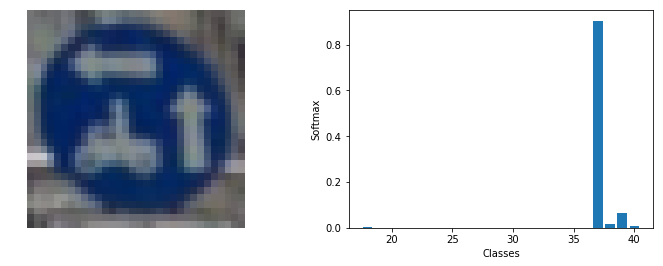

-------------------------
Go straight or left (90.4%)
Keep left (6.3%)
Keep right (1.8%)
Roundabout mandatory (1.0%)
General caution (0.4%)
-------------------------


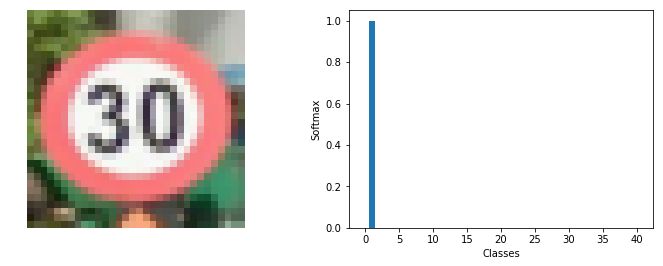

-------------------------
Speed limit (30km/h) (100.0%)
Speed limit (70km/h) (0.0%)
Speed limit (80km/h) (0.0%)
Speed limit (20km/h) (0.0%)
Roundabout mandatory (0.0%)
-------------------------


In [27]:
for i in range(len(localsigns)):
    show_result(i)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Most signs were identified correctly. Besides those Taiwan only signs, two of the local signs were not correctly classified and the correct answer doesn't have high score either.

The blue sign with right arrow is "One way" in Taiwan. It was classified as "No Entry". I think it was because the bar are similar in two signs after normalization.

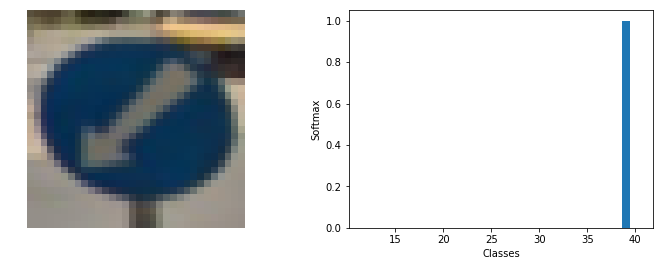

-------------------------
Keep left (100.0%)
Turn right ahead (0.0%)
Go straight or left (0.0%)
Roundabout mandatory (0.0%)
Priority road (0.0%)
-------------------------


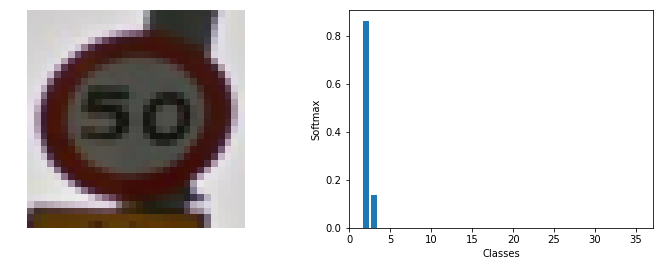

-------------------------
Speed limit (50km/h) (86.2%)
Speed limit (60km/h) (13.7%)
Speed limit (80km/h) (0.1%)
No passing (0.1%)
Ahead only (0.0%)
-------------------------


In [28]:
show_result(4)
show_result(9)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.